# Lexical Results (Teenagers)

This notebook loads the lexical CSV and visualizes:
- Monthly lexical complexity trends
- Average lexical complexity by user posting frequency

In [1]:
from pathlib import Path
import pandas as pd

from visualization import plot_lexical_trends_monthly, plot_complexity_by_user_frequency

pd.set_option("display.max_columns", 200)

In [2]:
# Expected file in Age-Variation folder
candidates = [
    Path("/scratch/network/nv9344/Thesis/Thesis-Data/Convokit/Age-Variation/subreddit-teenagers_lexical_df.csv"),
    Path("../../Thesis-Data/Convokit/Age-Variation/subreddit-teenagers_lexical_df.csv"),
    Path("../Thesis-Data/Convokit/Age-Variation/subreddit-teenagers_lexical_df.csv"),
]

csv_path = next((p for p in candidates if p.exists()), None)
if csv_path is None:
    raise FileNotFoundError(
        "Could not find subreddit-teenagers_lexical_df.csv in expected Age-Variation paths."
    )

print(f"Using CSV: {csv_path}")
df = pd.read_csv(csv_path)
print(df.shape)
df.head()

Using CSV: ../../Thesis-Data/Convokit/Age-Variation/subreddit-teenagers_lexical_df.csv
(328253, 10)


,timestamp,utterance_id,speaker_id,raw_text,num_utterances_by_speaker,mtld_score,yules_k,zipf_score,aoa_score,nawl_ratio
0,2013-05-01 19:27:17,1dik0f,Friquette,"Now this is probably a very uncommon question,...",1,47.804724,210.380623,6.261765,4.462361,0.0
1,2013-05-01 18:35:42,1dig3w,deulokiki,Been talking to this girl for about 2 month an...,3,48.170139,216.942149,6.224432,4.876667,0.0
2,2013-05-01 17:41:32,1dibwa,throwaway124356578,before I begin I would like to state that I am...,22,46.990072,153.993449,6.075079,4.799552,0.0
3,2013-05-01 16:46:19,1di78p,hxrhodes,Ok...so I'm just going to rant a little about ...,4,80.666667,130.455570,6.112521,4.839486,0.0
4,2013-05-01 14:51:37,1dhxxj,Greganderson56,So I have aspergers and maybe bipolar.\nI don'...,1,42.284223,171.182525,6.066739,4.782920,0.0


In [3]:
# Ensure timestamp is parsed for monthly trend plotting
df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")
df = df.dropna(subset=["timestamp"]).sort_values("timestamp")
df[["timestamp", "num_utterances_by_speaker"]].head()

,timestamp,num_utterances_by_speaker
40736,2011-01-16 19:02:56,1
40737,2011-01-16 19:07:27,1
40738,2011-01-16 20:23:16,2
40739,2011-08-20 11:58:51,2
40740,2011-08-20 12:52:37,1


/Users/nickvick/Library/CloudStorage/OneDrive-PrincetonUniversity/ORFE/Thesis/ORFE-Thesis/src/visualization.py:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = ts_df[metrics].resample("M").mean()


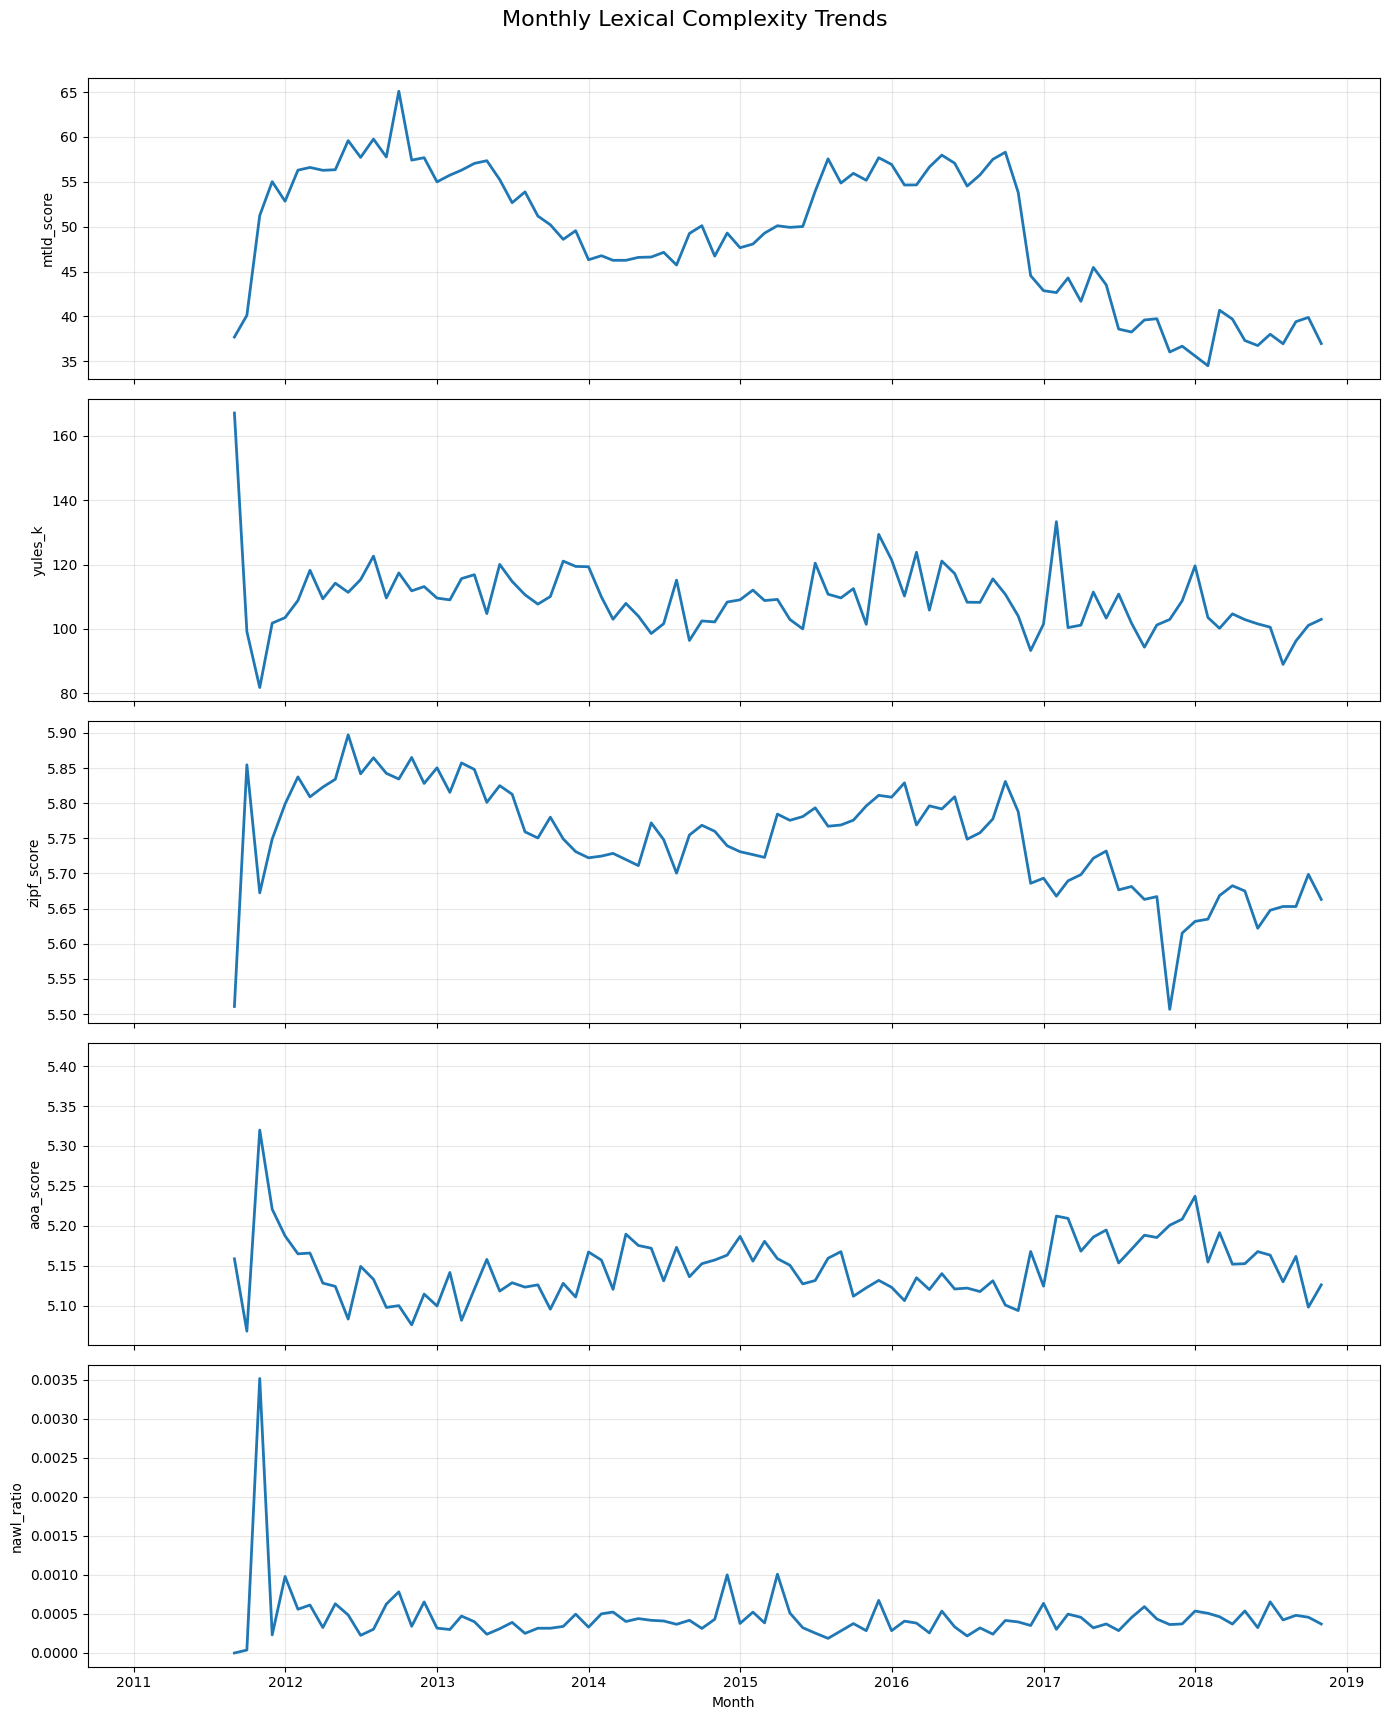

In [4]:
plot_lexical_trends_monthly(df)

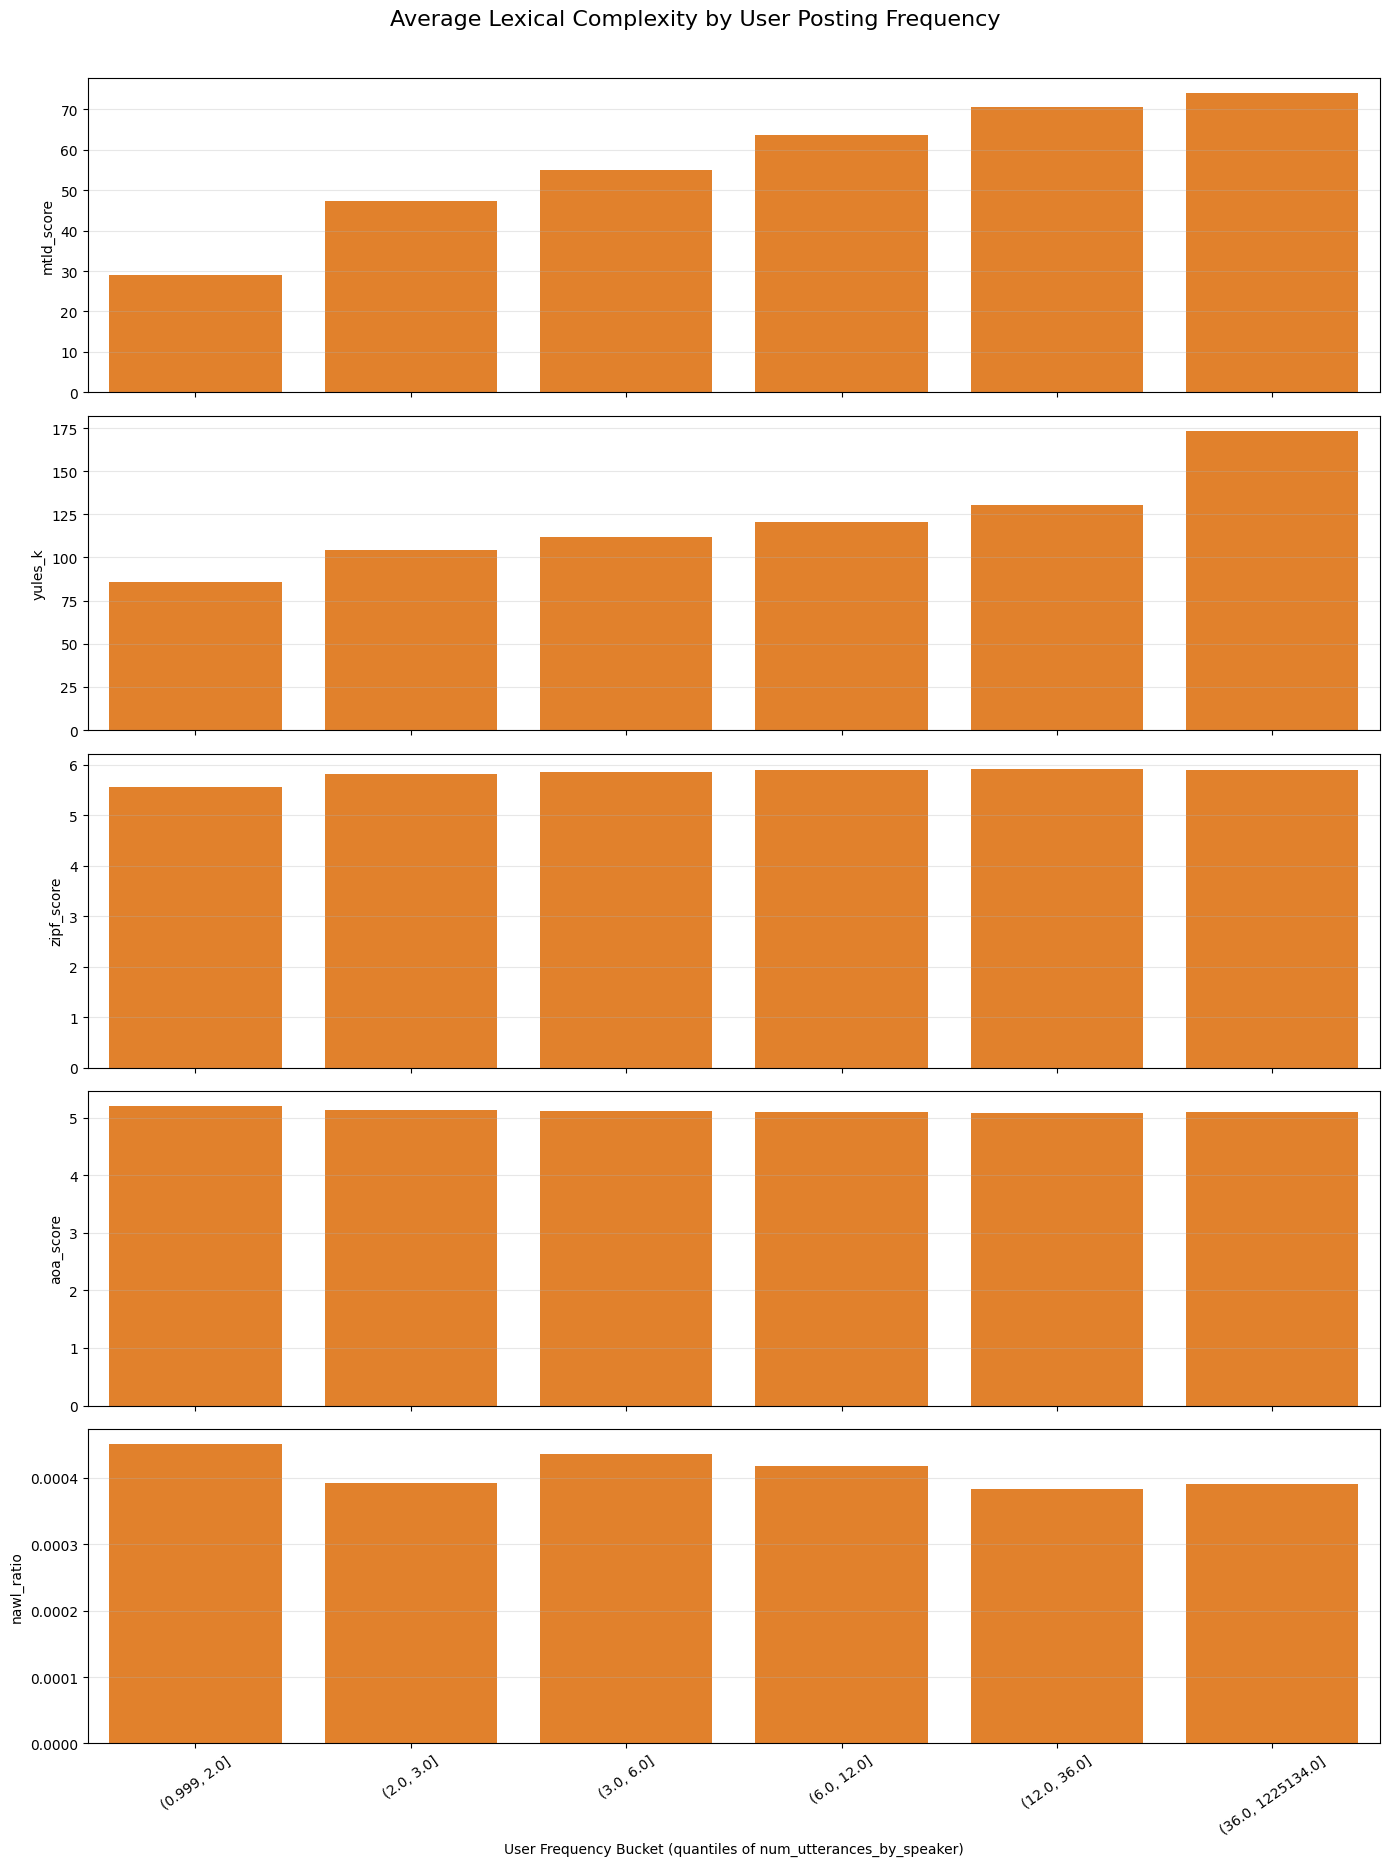

In [5]:
plot_complexity_by_user_frequency(df, bins=10)